# PART 02. 데이터 전처리

## 5장. 결측치

### 1절. 결측치 인식

#### [Problem] 결측치 파악 및 개수 확인
- airquality 데이터의 Ozone 변수에 대한 na 값 존재 여부를 파악하고, 만약 na가 존재한다면 결측치의 개수를 확인

In [5]:
import pandas as pd

df_airq = pd.read_csv( "C:/Users/Administrator/GitHub/TIL/ADP_study/rawdata/airquality.csv",
                      index_col='Unnamed: 0' )

display(df_airq)

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
149,30.0,193.0,6.9,70,9,26
150,NaN,145.0,13.2,77,9,27
151,14.0,191.0,14.3,75,9,28
152,18.0,131.0,8.0,76,9,29


In [2]:
# 각각의 데이터들이 결측치인지 확인
pd.isnull(df_airq)
df_airq.isnull()

# 각각의 데이터들이 결측치가 아닌지 확인
pd.notnull(df_airq)
df_airq.notnull()

,Ozone,Solar.R,Wind,Temp,Month,Day
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
5,False,False,True,True,True,True
...,...,...,...,...,...,...
149,True,True,True,True,True,True
150,False,True,True,True,True,True
151,True,True,True,True,True,True
152,True,True,True,True,True,True


In [3]:
# 컬럼별 결측치 개수
df_airq.isnull().sum()

# 컬럼별 결측치가 아닌 데이터 개수
df_airq.notnull().sum()

Ozone      116
Solar.R    146
Wind       153
Temp       153
Month      153
Day        153
dtype: int64

In [4]:
# Ozone 변수에 존재하는 na의 개수 산출
df_airq['Ozone'].isnull().sum()

37

#### [Problem] 특정 컬럼에서 결측치가 아닌 데이터와 결측치의 개수 비교

(array([False,  True]), array([116,  37], dtype=int64))

False    116
True      37
Name: Ozone, dtype: int64

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ozone', ylabel='count'>

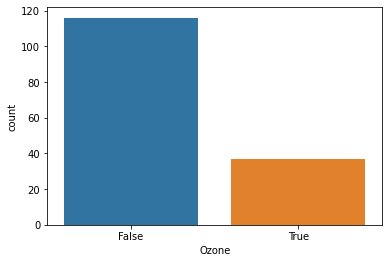

In [5]:
# Ozone 변수에서 na가 아닌 값과 na값의 개수 비교
x = df_airq['Ozone'].isnull()

# numpy 를 이용
import numpy as np
display( np.unique(x, return_counts=True) )
print()

# pandas 를 이용
display( pd.Series( x.value_counts() ) )
print()

# seaborn 을 이용
import seaborn as sb
display( sb.countplot(x) )

#### [Problem] 컬럼별 결측치 개수 확인
- airquality 데이터의 모든 변수에 대해 각각 결측치(na값)가 몇 개씩 존재하는지 확인

In [6]:
df_airq.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

#### [Problem] 결측치에 따른 데이터 분류
- airquality 데이터에서 na값이 하나라도 존재하는 행들을 air_na 함수에 저장하고, na값을 하나도 가지지 않는 행들을 air_com 변수에 저장

In [7]:
# 각각의 행 별로 결측치의 개수 합 계산
y = df_airq.isnull().sum(1)

# 행별 결측치에 따라 데이터 분류

air_na = df_airq.loc[ y != 0 ]

air_com = df_airq.loc[ y == 0 ]

display( 'air_na', air_na.head(), print(), 'air_com', air_com.head())

'air_na'

,Ozone,Solar.R,Wind,Temp,Month,Day
5,NaN,NaN,14.3,56,5,5
6,28.0,NaN,14.9,66,5,6
10,NaN,194.0,8.6,69,5,10
11,7.0,NaN,6.9,74,5,11
25,NaN,66.0,16.6,57,5,25


None

'air_com'

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
7,23.0,299.0,8.6,65,5,7


### 2절. 결측치 처리

#### [Problem] 결측치 제거
- airquality의 Ozone 에서 결측치가 존재하는 경우, 결측치가 존재하는 행 제거

In [8]:
import numpy as pd
import pandas as pd

# airquality 데이터 프레임 생성
df_airq = pd.read_csv( "C:/Users/Administrator/GitHub/TIL/ADP_study/rawdata/airquality.csv",
                      index_col='Unnamed: 0' )
display(df_airq)

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
149,30.0,193.0,6.9,70,9,26
150,NaN,145.0,13.2,77,9,27
151,14.0,191.0,14.3,75,9,28
152,18.0,131.0,8.0,76,9,29


In [9]:
# 결측치가 포함된 행 제거: .dropna() 사용
# axis 옵션은 행을 삭제할 경우 1, 열을 삭제할 경우 0 이다.

df_airq.dropna(axis=0)    

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
7,23.0,299.0,8.6,65,5,7
...,...,...,...,...,...,...
148,14.0,20.0,16.6,63,9,25
149,30.0,193.0,6.9,70,9,26
151,14.0,191.0,14.3,75,9,28
152,18.0,131.0,8.0,76,9,29


#### [Problem] 평균 대치법
- airquality의 Ozone 변수값이 결측치일 경우, 결측치를 Ozone 변수 값들의 평균으로 대치

In [10]:
# airqulity 의 Ozone 컬럼의 평균 구하기
ozone_mean = df_airq.describe().loc['mean','Ozone']
print('Ozone 평균값:', ozone_mean)
print()

# Ozone 데이터 값 중 결측치를 평균값으로 대체
# .fillna() 사용
df_airq['Ozone'].fillna(ozone_mean, inplace=True)
df_airq

Ozone 평균값: 42.12931034482759



,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.00000,190.0,7.4,67,5,1
2,36.00000,118.0,8.0,72,5,2
3,12.00000,149.0,12.6,74,5,3
4,18.00000,313.0,11.5,62,5,4
5,42.12931,NaN,14.3,56,5,5
...,...,...,...,...,...,...
149,30.00000,193.0,6.9,70,9,26
150,42.12931,145.0,13.2,77,9,27
151,14.00000,191.0,14.3,75,9,28
152,18.00000,131.0,8.0,76,9,29


#### [Problem] 결측치를 중위수로 대치
- airquality의 Ozone 변수값이 결측치일 경우, 결측치를 Ozone 변수 값들의 중위수로 대치

In [11]:
# 위 문제에서 NA 값을 평균값으로 대체하는 원본 객체 수정이 발생했기 때문에 데이터 프레임을 새로 생성한다.

df_airq = pd.read_csv( "C:/Users/Administrator/GitHub/TIL/ADP_study/rawdata/airquality.csv",
                      index_col='Unnamed: 0' )
display(df_airq)

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
149,30.0,193.0,6.9,70,9,26
150,NaN,145.0,13.2,77,9,27
151,14.0,191.0,14.3,75,9,28
152,18.0,131.0,8.0,76,9,29


In [12]:
# airqulity 의 Ozone 컬럼의 중위수 구하기
ozone_median = df_airq.describe().loc['50%', 'Ozone']
print('Ozone 중위수:', ozone_median)

## Ozone 데이터 값 중 결측치를 중위수로 대체
df_airq['Ozone'].fillna(ozone_median, inplace=True)
df_airq

Ozone 중위수: 31.5


,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,31.5,NaN,14.3,56,5,5
...,...,...,...,...,...,...
149,30.0,193.0,6.9,70,9,26
150,31.5,145.0,13.2,77,9,27
151,14.0,191.0,14.3,75,9,28
152,18.0,131.0,8.0,76,9,29


### 3절. 이상치 인식

#### [Problem] boxplot을 활용한 이상치 판별
- 내장데이터 airquality의 Ozone변수에 대한 boxplot을 출력하라.
- 또한 이를 OzoneBP 이라는 변수에 저장하여 lower whisker와 upper whisker 밖에 있는 이상치가 존재하는지를 확인하라.

In [13]:
import pandas as pd
import seaborn as sb

df_airq = pd.read_csv("C:/Users/Administrator/GitHub/TIL/ADP_study/rawdata/airquality.csv",
                      index_col='Unnamed: 0')

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ozone'>

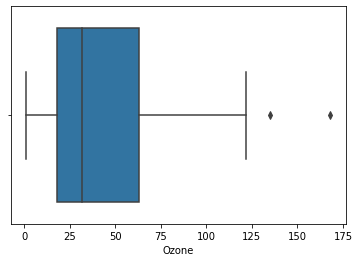

In [14]:
sb.boxplot(df_airq['Ozone'])


#### [Problem] 이상치
- lower whisker(Q1-1.5×IQR) 보다 작거나 upper whisker(Q3+1.5×IQR) 보다 큰 값들을 이상치로 간주하고, 해당 값들이 저장된 행번호를 각각 upperOutlier, lowerOutlier변수에 저장하라.
- 그리고 해당 행을 출력하여 데이터를 확인해보자.

In [15]:
# Ozone의 1사분위수를 LowerQ에 저장
LowerQ = df_airq.describe().loc['25%', 'Ozone']
print('LowerQ\n', LowerQ)
print()

# Ozone의 3사분위수를 UpperQ에 저장
UpperQ = df_airq.describe().loc['75%', 'Ozone']
print('UpperQ\n', UpperQ)
print()

# Ozone 변수의 IQR을 구하여 IQR변수에 저장
IQR = UpperQ - LowerQ
print('IQR\n', IQR)
print()

# Ozone 값이 UpperQ+IQR*1.5 보다 큰 이상치를 upperOutlier에 저장
upperOutlier = df_airq.loc[ (df_airq['Ozone'] > UpperQ + IQR*1.5) ]
print('upperOutlier\n', upperOutlier)
print()

# Ozone 값이 LowerQ-IQR*1.5 보다 작은 이상치를 lowerOutlier에 저장
lowerOutlier = df_airq.loc[ (df_airq['Ozone'] < LowerQ - IQR*1.5) ]
print('lowerOutlier\n', lowerOutlier)

LowerQ
 18.0

UpperQ
 63.25

IQR
 45.25

upperOutlier
      Ozone  Solar.R  Wind  Temp  Month  Day
62   135.0    269.0   4.1    84      7    1
117  168.0    238.0   3.4    81      8   25

lowerOutlier
 Empty DataFrame
Columns: [Ozone, Solar.R, Wind, Temp, Month, Day]
Index: []
